Цель данного проекта - разработать эффективную скоринговую модель для вторичных клиентов банка, чтобы предсказать вероятность дефолта. Для достижения этой цели мы проанализируем множество переменных, характеризующих профиль заемщиков.

В качестве анализируемых данных используется набор, представленный на платформе Kaggle под названием «[SF-DST] Credit Scoring». Этот набор включает в себя множество атрибутов, характеризующих заемщиков, таких как уровень образования, пол, возраст, наличие автомобиля, количество отказов по прошлым заявкам и многие другие. Каждый из этих признаков может быть важен для построения точной модели, способной предсказать вероятность дефолта.

Мы сосредоточимся на изучении этих переменных и других аспектов данных, чтобы выявить и определить значимые факторы, влияющие на вероятность дефолта клиента. Эффективная скоринговая модель, построенная на основе этих анализов, позволит банку более точно оценивать риски при выдаче кредитов и принимать более обоснованные решения.

Следующие этапы нашего анализа будут включать предварительную обработку данных, исследовательский анализ данных, построение модели и ее оценку.

# 1. Импорт необходимых библиотек

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score, roc_auc_score, f1_score,log_loss, classification_report, roc_curve

import warnings
warnings.filterwarnings("ignore");

RAND = 10

**Описание полей**

* `client_id` - идентификатор клиента

* `education` - уровень образования

* `sex` - пол заемщика

* `age` - возраст заемщика

* `car` - наличие автомобиля

* `car_type` - флаг иностранного автомобиля

* `decline_app_cnt` - количество отклоненных заявок в прошлом

* `good_work` - флаг наличия "хорошей" работы

* `bki_request_cnt` - количество запросов в БКИ

* `home_address` - категория домашнего адреса

* `work_address` - категория рабочего адреса

* `income` - доход заемщика

* `foreign_passport` - наличие заграничного паспорта

* `sna` - связь заемщика с клиентами банка

* `first_time` - возраст наличия информации о заемщике

* `score_bki` - скоринговый балл по данным БКИ

* `region_rating` - рейтинг региона

* `app_date` - дата подачи заявки

* `default` - флаг дефолта по кредиту

In [ ]:
data = pd.read_csv('train.csv')
data

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,04MAR2014,GRD,F,45,N,N,0,0,-1.792064,3,50,1,2,17000,4,4,N,0
73795,76821,24MAR2014,SCH,M,41,Y,Y,0,0,-2.058029,1,50,2,2,70000,1,4,N,0
73796,103695,22APR2014,SCH,M,31,N,N,0,0,-1.512635,4,80,2,3,45000,2,2,N,0
73797,861,04JAN2014,SCH,F,29,N,N,0,1,-1.479334,3,50,1,3,13000,2,3,N,1


In [ ]:
print(f'Train size = rows {data.shape[0]}, columns {data.shape[1]}')

Train size = rows 73799, columns 19


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [ ]:
data.isnull().sum()

client_id             0
app_date              0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
dtype: int64

In [ ]:
data['education'].isnull().sum() / data.shape[0]*100

0.41599479667746175

Разрыв в графе «Образование» составляет около 41,599%

In [ ]:
data['education'].unique()

array(['SCH', 'GRD', 'UGR', 'PGR', 'ACD', nan], dtype=object)

- `SCH` - школьник

- `GRD` - выпускник

- `UGR` - студент

- `PGR` - аспирант

- `ACD` - академик

In [ ]:
ed_mode = data['education'].mode()[0]
data['education'] = data['education'].fillna(ed_mode)

Переведем атрибуты в категориальную форму, где категории задаются в качестве значений по условию

In [ ]:
data.describe()

,client_id,age,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,default
count,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000
mean,55137.965094,39.280641,0.275749,0.164894,-1.904724,2.000339,56.725701,1.575509,2.496280,41099.775417,1.733330,2.765458,0.126994
std,31841.921168,11.520378,0.804272,0.371087,0.498231,2.252073,13.055717,0.527631,0.689818,46166.322400,1.123622,1.009463,0.332968
min,1.000000,21.000000,0.000000,0.000000,-3.624586,0.000000,20.000000,1.000000,1.000000,1000.000000,1.000000,1.000000,0.000000
25%,27440.500000,30.000000,0.000000,0.000000,-2.259534,0.000000,50.000000,1.000000,2.000000,20000.000000,1.000000,2.000000,0.000000
50%,55274.000000,37.000000,0.000000,0.000000,-1.920823,1.000000,50.000000,2.000000,3.000000,30000.000000,1.000000,3.000000,0.000000
75%,82758.500000,48.000000,0.000000,0.000000,-1.569831,3.000000,60.000000,2.000000,3.000000,48000.000000,2.000000,4.000000,0.000000
max,110147.000000,72.000000,33.000000,1.000000,0.199773,53.000000,80.000000,3.000000,3.000000,1000000.000000,4.000000,4.000000,1.000000


In [ ]:
data.nunique()

client_id           73799
app_date              120
education               5
sex                     2
age                    52
car                     2
car_type                2
decline_app_cnt        21
good_work               2
score_bki           69096
bki_request_cnt        38
region_rating           7
home_address            3
work_address            3
income                966
sna                     4
first_time              4
foreign_passport        2
default                 2
dtype: int64

In [ ]:
data.home_address.unique()

array([1, 2, 3])

In [ ]:
data[['home_address',
      'work_address']] = data[['home_address',
                                'work_address']].astype(object)

In [ ]:
data.describe(include=object)

,app_date,education,sex,car,car_type,home_address,work_address,foreign_passport
count,73799,73799,73799,73799,73799,73799,73799,73799
unique,120,5,2,2,2,3,3,2
top,18MAR2014,SCH,F,N,N,2,3,N
freq,1018,39167,41562,49832,59791,39956,44959,62733


# 2. Изучение данных


**Гипотезы:**

- Возраст "хороших" заемщиков больше по сравнению с "плохими" заемщиками (распределение возраста в зависимости от флага дефолта смещено вверх при `default=0`).
- Уровень образования зависит от возраста, что также влияет на погашение кредита. Люди с более высоким образованием чаще являются "хорошими" заемщиками.
- При `good_work` = 0 риск дефолта по кредиту увеличивается (флаг дефолта).
- Доход "хороших" заемщиков выше по сравнению с "плохими" заемщиками (распределение доходов в зависимости от флага дефолта смещено вверх при `default=0`).
- `score_bki` напрямую коррелирует с `default`: чем ниже `score_bki`, тем выше вероятность того, что клиент погасит кредит банку.

## 2.1 Целевая переменная


Во-первых, нам нужно изучить целевую переменную

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100')])

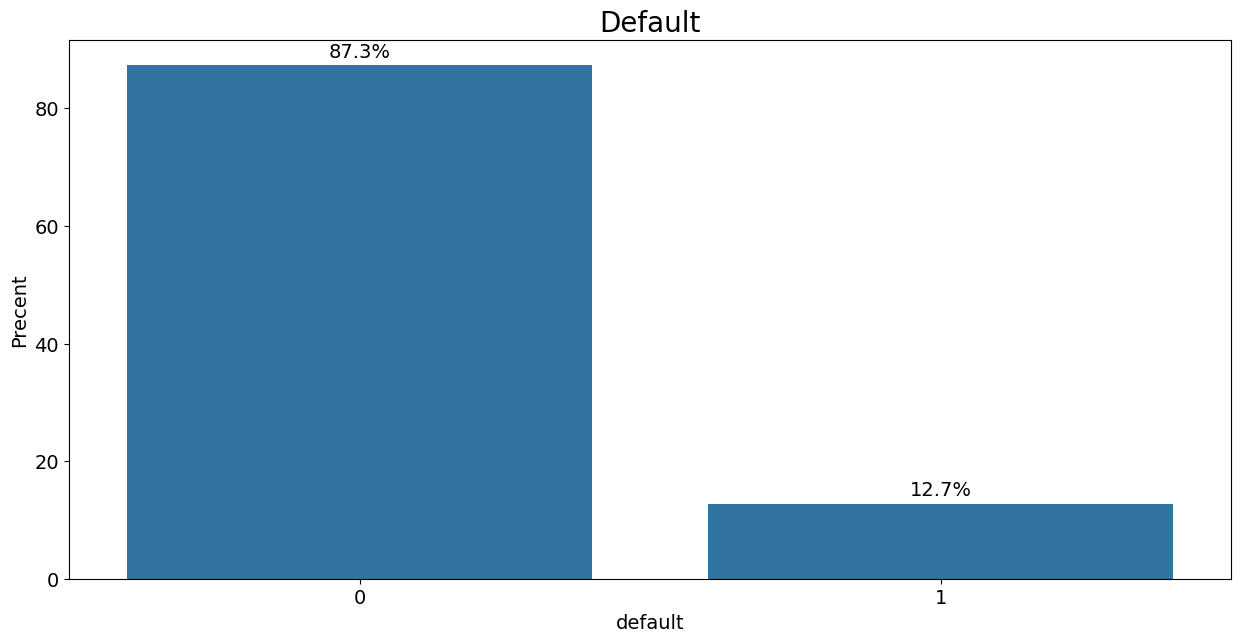

In [ ]:
# Нормирование по размеру набора данных
norm_target = (data['default']
                              .value_counts(normalize=True)
                              .mul(100)
                              .rename('percent')
                              .reset_index())

plt.figure(figsize=(15,7))
ax = sns.barplot(x='index', y='percent', data=norm_target)

# Отображение значений над графиками - annotate()
# В цикле мы просматриваем каждый столбец графика и отмечаем на нем значения
for p in ax.patches:
  percentage = '{:.1f}%'.format(p.get_height())
  ax.annotate(percentage, # Текст для %
              (p.get_x() + p.get_width() / 2., p.get_height()), # xy координаты
              ha = 'center', # Центр
              va = 'center',
              xytext = (0, 10),
              textcoords = 'offset points', # Точка смещения относительно координаты
              fontsize = 14)

plt.title('Default', fontsize = 20)
plt.xlabel('default', fontsize = 14)
plt.ylabel('Precent', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

В наборе данных существует дисбаланс классов, и при обучении модели стоит это учитывать

## 2.2 Возраст

(array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045]),
 [Text(0, 0.0, '0.000'),
  Text(0, 0.005, '0.005'),
  Text(0, 0.01, '0.010'),
  Text(0, 0.015, '0.015'),
  Text(0, 0.02, '0.020'),
  Text(0, 0.025, '0.025'),
  Text(0, 0.03, '0.030'),
  Text(0, 0.035, '0.035'),
  Text(0, 0.04, '0.040'),
  Text(0, 0.045, '0.045')])

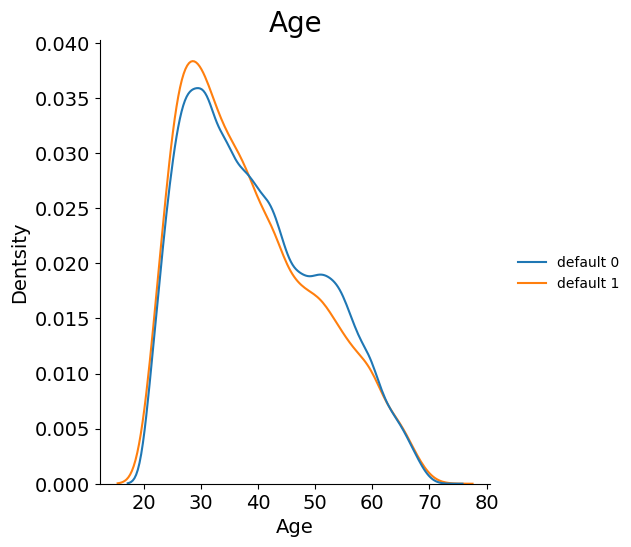

In [ ]:
sns.displot(
    {
        "default 0": data[data['default'] == 0]['age'],
        "default 1": data[data['default'] == 1]['age']
    }, kind = "kde",
    common_norm=False # независимая нормализация каждого подмножества
)

plt.title('Age', fontsize = 20)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Dentsity', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [ ]:
data.groupby('default')['age'].median()

default
0    38.0
1    36.0
Name: age, dtype: float64

In [ ]:
data.groupby('default')['age'].mean()

default
0    39.390504
1    38.525395
Name: age, dtype: float64

In [ ]:
data.groupby('default')['age'].apply(lambda x: x.value_counts().index[0]).reset_index()

,default,age
0,0,31
1,1,26


В разделе "default" наблюдаются небольшие различия по возрасту, гипотеза подтверждается

## 2.3 Образование


(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.01, '0.01'),
  Text(0, 0.02, '0.02'),
  Text(0, 0.03, '0.03'),
  Text(0, 0.04, '0.04'),
  Text(0, 0.05, '0.05')])

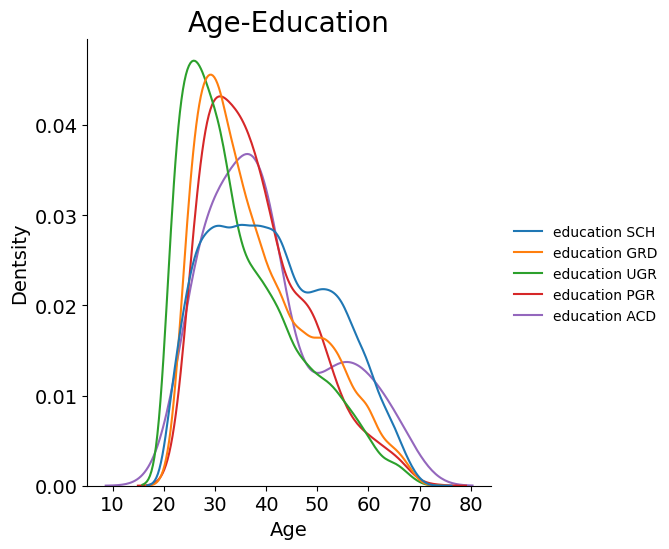

In [ ]:
sns.displot(
    {
        "education SCH": data[data['education'] == 'SCH'].age,
        "education GRD": data[data['education'] == 'GRD'].age,
        "education UGR": data[data['education'] == 'UGR'].age,
        "education PGR": data[data['education'] == 'PGR'].age,
        "education ACD": data[data['education'] == 'ACD'].age,
    }, kind = "kde",
    common_norm=False
)

plt.title('Age-Education', fontsize = 20)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Dentsity', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

Если взять образование `SCH`, то возраст смещен в большую сторону, по сравнению с тем же `UGR`. Для ACD характерно смещение возрастного распределения влево, если сравнивать с `PGR`, что в принципе понятно. Самые молодые - это `UGR`, и предполагается, что в значительной степени они будут «плохими» заемщиками.

(array([10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70'),
  Text(0, 80.0, '80')])

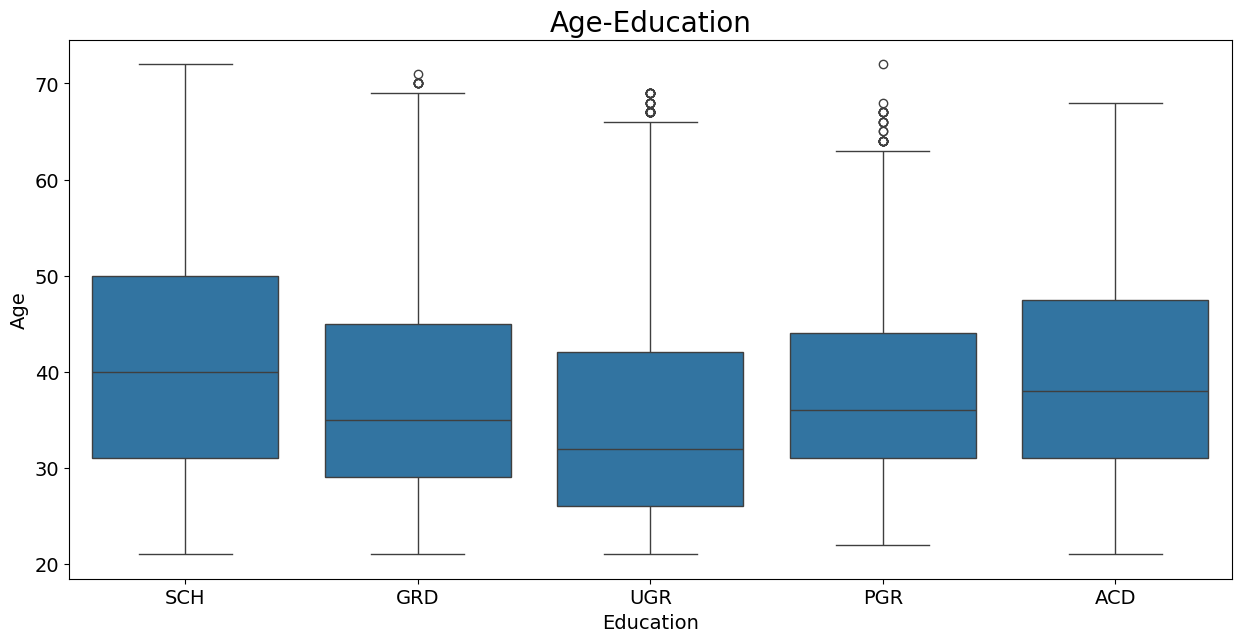

In [ ]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='education', y='age', data=data)

plt.title('Age-Education', fontsize = 20)
plt.xlabel('Education', fontsize = 14)
plt.ylabel('Age', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

(array([10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70'),
  Text(0, 80.0, '80')])

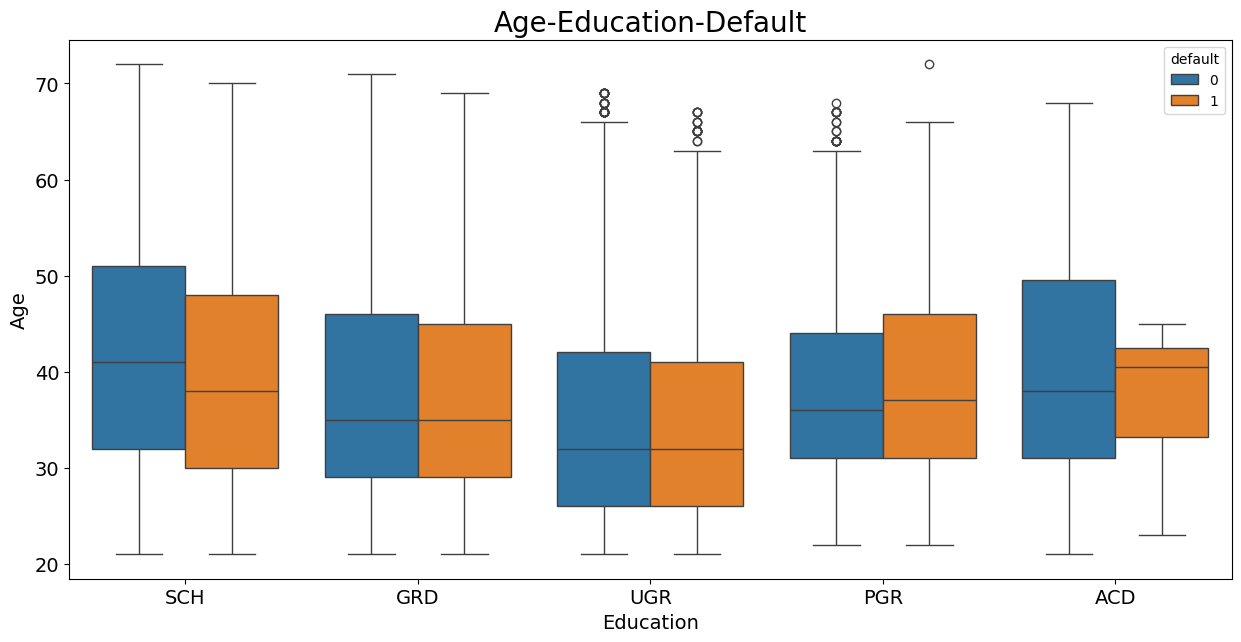

In [ ]:
plt.figure(figsize=(15,7))

sns.boxplot(x='education', y='age', hue='default', data=data)

plt.title('Age-Education-Default', fontsize = 20)
plt.ylabel('Age', fontsize = 14)
plt.xlabel('Education', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

Видно, что если взять уровень образования `PGR` и `ACD`, то средний возраст «плохих» заемщиков выше, чем у «хороших», но разброс значений обоих показателей также велик. Возможно, если взять некий возрастной предел, например, от 30 до 50 лет, то в рамках этой группы данный показатель не будет сильно влиять на полноту погашения кредита.

In [ ]:
data.groupby('education')['age'].median()

education
ACD    38.0
GRD    35.0
PGR    36.0
SCH    40.0
UGR    32.0
Name: age, dtype: float64

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70')])

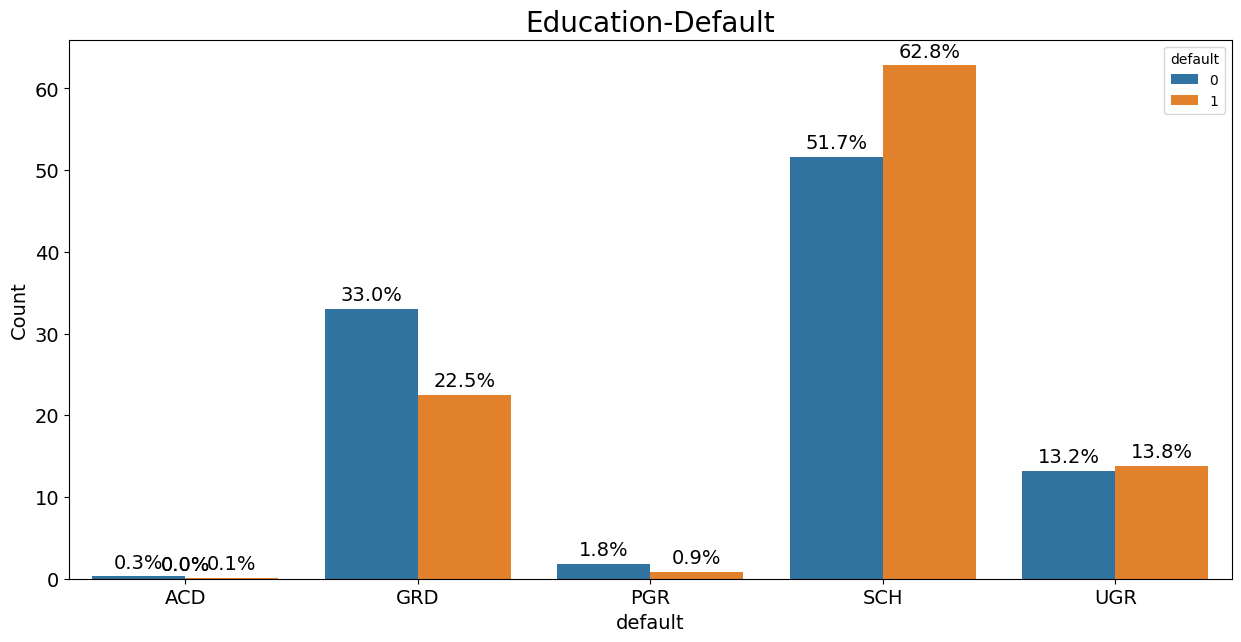

In [ ]:
plt.figure(figsize=(15, 7))

educ_def = (data.groupby(['default'])['education']
                .value_counts(normalize=True)
                .rename('percentage')
                .mul(100)
                .reset_index()
                .sort_values('education'))

ax = sns.barplot(x='education',
                 y='percentage',
                 hue='default',
                 data=educ_def)

for p in ax.patches:
  percentage = '{:.1f}%'.format(p.get_height())
  ax.annotate(percentage,
              (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center',
              va='center',
              xytext=(0, 10),
              textcoords='offset points',
              fontsize=14)

plt.title('Education-Default', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('default', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

Аналогично, мы видим, что процент недобросовестных слесарей выше с уровнем образования `SCH', для `UGR' разница не существенна. Скорее, в данном случае влияет не сам возраст, а уровень образования. Также можно отменить, что в некоторой степени `УГР` более стабильны в плане выплат.

## 2.4 Corr

In [ ]:
data[num_cols].corr()

,age,decline_app_cnt,good_work,bki_request_cnt,region_rating,income,sna,first_time,score_bki
age,1.000000,-0.111175,-0.076158,0.046265,-0.089501,-0.018900,-0.059542,0.079046,-0.106275
decline_app_cnt,-0.111175,1.000000,-0.027359,0.155894,-0.038505,-0.021687,0.065297,-0.069099,0.189987
good_work,-0.076158,-0.027359,1.000000,0.005738,0.073041,0.022705,-0.054041,0.055821,0.006269
bki_request_cnt,0.046265,0.155894,0.005738,1.000000,0.009025,0.082983,0.005139,0.014859,0.156257
region_rating,-0.089501,-0.038505,0.073041,0.009025,1.000000,0.205674,-0.078199,0.088777,0.008959
income,-0.018900,-0.021687,0.022705,0.082983,0.205674,1.000000,-0.087800,0.109893,-0.012639
sna,-0.059542,0.065297,-0.054041,0.005139,-0.078199,-0.087800,1.000000,-0.525206,0.067623
first_time,0.079046,-0.069099,0.055821,0.014859,0.088777,0.109893,-0.525206,1.000000,-0.069122
score_bki,-0.106275,0.189987,0.006269,0.156257,0.008959,-0.012639,0.067623,-0.069122,1.000000


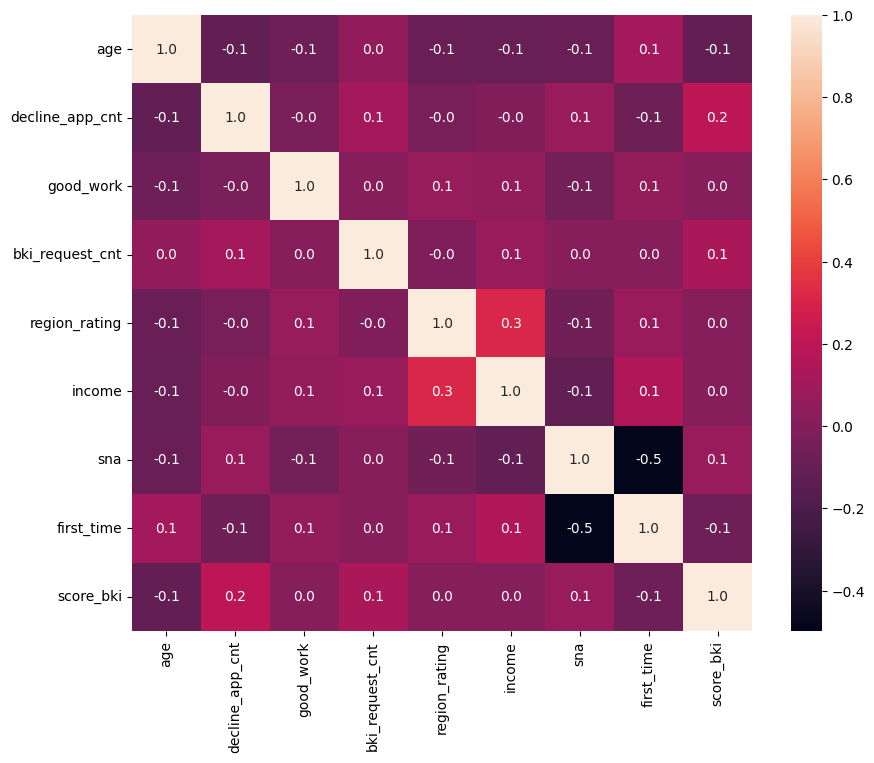

In [ ]:
num_cols = ['age', 'decline_app_cnt', 'good_work', 'bki_request_cnt', 'region_rating', 'income', 'sna', 'first_time', 'score_bki']

plt.figure(figsize=(10, 8))
sns.heatmap(data[num_cols]
            .corr(method='spearman'),
            annot=True, fmt=".1f");

## 2.5 Доход

(array([0.0e+00, 5.0e-06, 1.0e-05, 1.5e-05, 2.0e-05, 2.5e-05, 3.0e-05]),
 [Text(0, 0.0, '0.0'),
  Text(0, 4.9999999999999996e-06, '0.5'),
  Text(0, 9.999999999999999e-06, '1.0'),
  Text(0, 1.4999999999999999e-05, '1.5'),
  Text(0, 1.9999999999999998e-05, '2.0'),
  Text(0, 2.4999999999999998e-05, '2.5'),
  Text(0, 2.9999999999999997e-05, '3.0')])

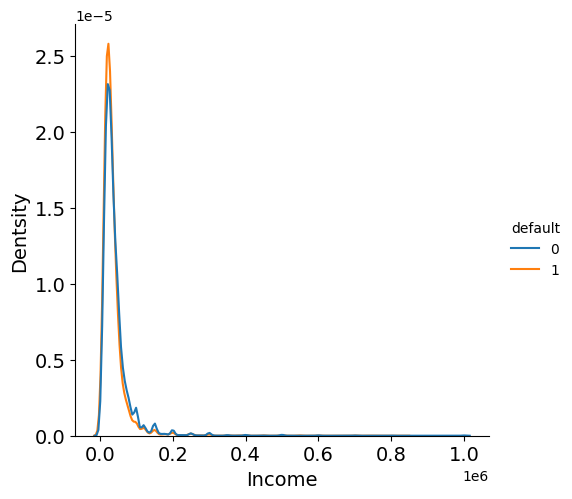

In [ ]:
sns.displot(data,
            x='income',
            hue='default',
            kind="kde",
            common_norm=False)

plt.xlabel('Income', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

Распределение зарплат имеет ненормальное распределение, и для его анализа достаточно длинных хвостов.

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000.]),
 [Text(0, -200000.0, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 200000.0, '0.2'),
  Text(0, 400000.0, '0.4'),
  Text(0, 600000.0, '0.6'),
  Text(0, 800000.0, '0.8'),
  Text(0, 1000000.0, '1.0'),
  Text(0, 1200000.0, '1.2')])

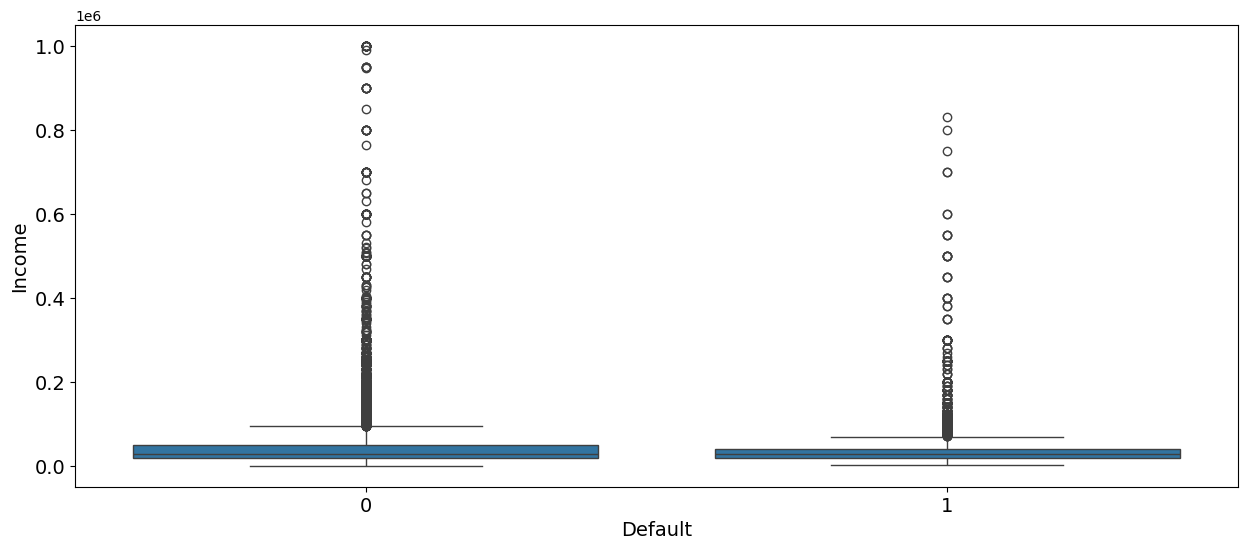

In [ ]:
plt.figure(figsize = (15, 6))

sns.boxplot(x = 'default',
            y = 'income',
            data = data)

plt.ylabel('Income', fontsize=14)
plt.xlabel('Default', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [ ]:
data.groupby('default')['income'].mean()

default
0    41799.713288
1    36288.113316
Name: income, dtype: float64

In [ ]:
data.groupby('default')['income'].median()

default
0    30000.0
1    28000.0
Name: income, dtype: float64

In [ ]:
data_income = data.copy()
data_income['income'] = np.log(data['income'] + 1)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8')])

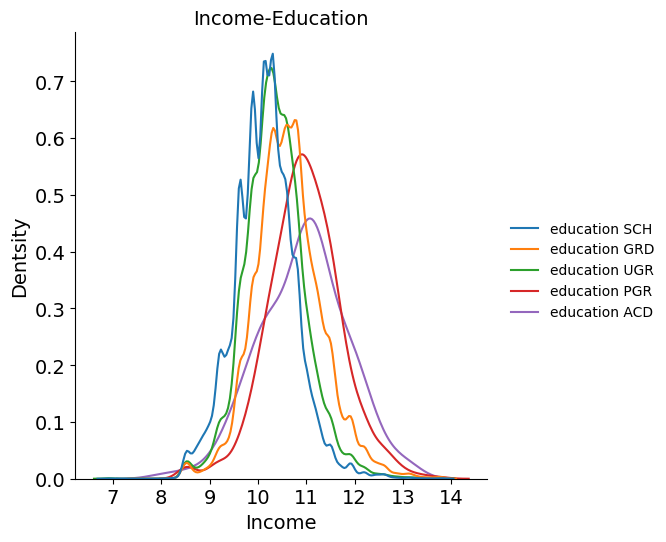

In [ ]:
sns.displot(
    {
        "education SCH": data_income[data_income['education'] == 'SCH']['income'],
        "education GRD": data_income[data_income['education'] == 'GRD']['income'],
        "education UGR": data_income[data_income['education'] == 'UGR']['income'],
        "education PGR": data_income[data_income['education'] == 'PGR']['income'],
        "education ACD": data_income[data_income['education'] == 'ACD']['income']
    }, kind="kde",
    common_norm=False
)

plt.title('Income-Education', fontsize=14)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

Видно, что и здесь `ACD` и `PGR` смещены в правую сторону, что может означать, что они являются лучшими заемщиками по кредиту, чем `SCH` и `UGR`.

# 3. Разработка характеристик из датасета

In [ ]:
data.columns

Index(['client_id', 'app_date', 'education', 'sex', 'age', 'car', 'car_type',
       'decline_app_cnt', 'good_work', 'score_bki', 'bki_request_cnt',
       'region_rating', 'home_address', 'work_address', 'income', 'sna',
       'first_time', 'foreign_passport', 'default'],
      dtype='object')

In [ ]:
num_cols = ['age', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'income', 'first_time', 'region_rating']

Text(0.5, 0.98, 'Histograms of various features')

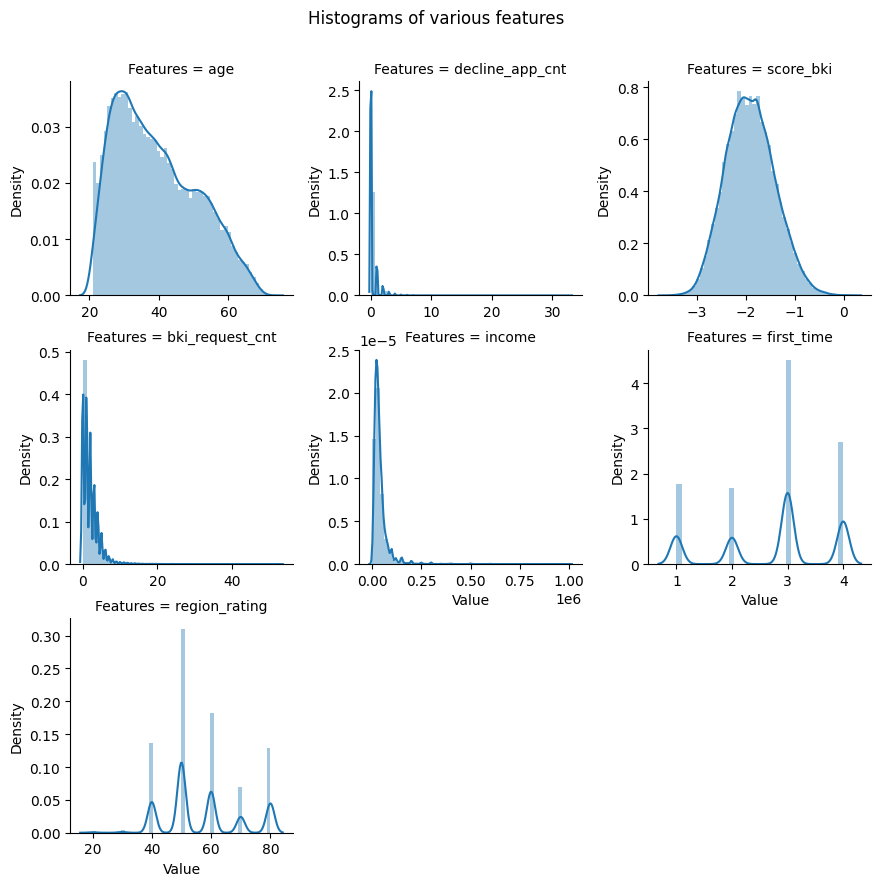

In [ ]:
numeric_features = data[num_cols]

numeric_features = numeric_features.stack().reset_index().rename(columns = {
                                            "level_1": "Features",
                                            0: "Value"
                                        })

ax = sns.FacetGrid(data=numeric_features, col="Features",
                   col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")
plt.subplots_adjust(top=.9)
plt.suptitle("Histograms of various features")

Мы исследуем распределения числовых данных. Возраст, количество приложений `decline_app_cnt` и `bki_request_cnt`, а также доход `Income` не являются нормально распределенными.

In [ ]:
for i in ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']:
  data[i] = np.log(data[i] + 1)

Text(0.5, 0.98, 'Histograms of various features')

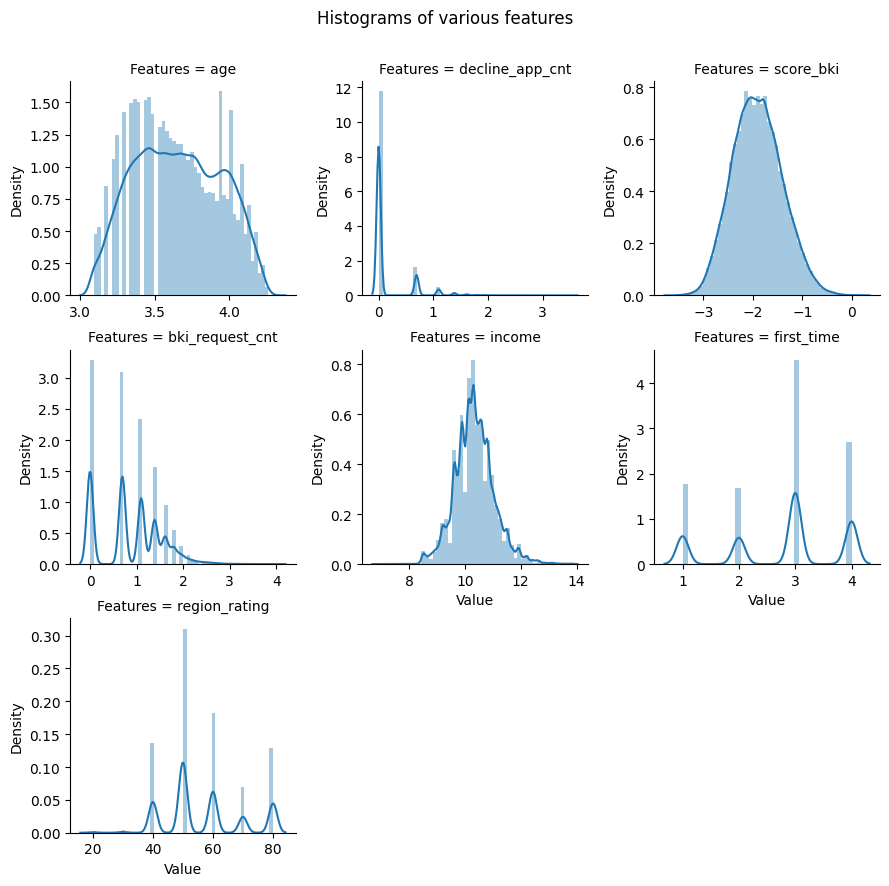

In [ ]:
numeric_features = data[num_cols]

numeric_features = numeric_features.stack().reset_index().rename(columns = {
                                                                     "level_1": "Features",
                                                                     0: "Value"
                                                                 })

ax = sns.FacetGrid(data = numeric_features, col="Features",
                   col_wrap = 3, sharex = False, sharey = False)
ax = ax.map(sns.distplot, "Value")
plt.subplots_adjust(top=.9)
plt.suptitle("Histograms of various features")

In [ ]:
# Новый знак - месяц
data['app_date'] = pd.to_datetime(data['app_date'], format='%d%b%Y')
data['month'] = data['app_date'].dt.month.astype(object)
data.drop(['app_date'], axis=1, inplace=True)

In [ ]:
# Средний доход с учетом рейтинга региона

mean_inc_reg = data.groupby('region_rating')['income'].median().to_dict()
data['mean_income_region'] = data['region_rating'].map(mean_inc_reg)

In [ ]:
# Средний доход с поправкой на возраст

mean_inc_age = data.groupby('age')['income'].median().to_dict()
data['mean_income_age'] = data['age'].map(mean_inc_age)

In [ ]:
# Средний показатель bki с поправкой на возраст

mean_bki_age = data.groupby('age')['score_bki'].median().to_dict()
data['mean_bki_age'] = data['age'].map(mean_bki_age)

In [ ]:
data[:5]

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,work_address,income,sna,first_time,foreign_passport,default,month,mean_income_region,mean_income_age,mean_bki_age
0,25905,SCH,M,4.143135,Y,Y,0.000000,0,-2.008753,0.693147,...,2,9.798183,4,1,N,0,2,10.126671,9.903538,-1.981476
1,63161,SCH,F,4.094345,N,N,0.000000,0,-1.532276,1.386294,...,3,9.852247,4,1,N,0,3,10.126671,9.998843,-1.994864
2,25887,SCH,M,3.258097,Y,N,1.098612,0,-1.408142,0.693147,...,2,10.308986,1,4,Y,0,2,10.757924,10.308986,-1.814637
3,16222,SCH,F,3.988984,N,N,0.000000,0,-2.057471,1.098612,...,3,9.210440,1,3,N,0,1,10.126671,10.212803,-1.993905
4,101655,GRD,M,3.891820,N,N,0.000000,1,-1.244723,0.693147,...,3,10.308986,1,4,Y,0,4,10.308986,10.308986,-1.988764


In [ ]:
cat_cols = ['education', 'sex', 'car', 'car_type', 'good_work', 'home_address', 'work_address', 'foreign_passport', 'sna', 'month']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   client_id           73799 non-null  int64  
 1   education           73799 non-null  object 
 2   sex                 73799 non-null  object 
 3   age                 73799 non-null  float64
 4   car                 73799 non-null  object 
 5   car_type            73799 non-null  object 
 6   decline_app_cnt     73799 non-null  float64
 7   good_work           73799 non-null  int64  
 8   score_bki           73799 non-null  float64
 9   bki_request_cnt     73799 non-null  float64
 10  region_rating       73799 non-null  int64  
 11  home_address        73799 non-null  object 
 12  work_address        73799 non-null  object 
 13  income              73799 non-null  float64
 14  sna                 73799 non-null  int64  
 15  first_time          73799 non-null  int64  
 16  fore

In [ ]:
num_cols = list(data.dtypes[data.dtypes == float].index) + list(data.dtypes[data.dtypes == int].index)[1:-1]
num_cols

['age',
 'decline_app_cnt',
 'score_bki',
 'bki_request_cnt',
 'income',
 'mean_income_region',
 'mean_income_age',
 'mean_bki_age',
 'good_work',
 'region_rating',
 'sna',
 'first_time']

# 4. Моделирование

In [ ]:
data_label = pd.get_dummies(data,
                            columns=cat_cols,
                            drop_first=True).drop('client_id', axis=1)
data_label[:5]

,age,decline_app_cnt,score_bki,bki_request_cnt,region_rating,income,first_time,default,mean_income_region,mean_income_age,...,home_address_3,work_address_2,work_address_3,foreign_passport_Y,sna_2,sna_3,sna_4,month_2,month_3,month_4
0,4.143135,0.000000,-2.008753,0.693147,50,9.798183,1,0,10.126671,9.903538,...,0,1,0,0,0,0,1,1,0,0
1,4.094345,0.000000,-1.532276,1.386294,50,9.852247,1,0,10.126671,9.998843,...,0,0,1,0,0,0,1,0,1,0
2,3.258097,1.098612,-1.408142,0.693147,80,10.308986,4,0,10.757924,10.308986,...,0,1,0,1,0,0,0,1,0,0
3,3.988984,0.000000,-2.057471,1.098612,50,9.210440,3,0,10.126671,10.212803,...,0,0,1,0,0,0,0,0,0,0
4,3.891820,0.000000,-1.244723,0.693147,60,10.308986,4,0,10.308986,10.308986,...,0,0,1,1,0,0,0,0,0,1


In [ ]:
X = data_label.drop('default', axis=1)
y = data_label['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y, shuffle=True, random_state=RAND)
# Specify stratify to correct the class imbalance

## 4.1 Baseline

In [ ]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_score = lr.predict_proba(X_test)[:, 1]

In [ ]:
print('roc-auc: ', roc_auc_score(y_test, y_score))
print('precision: ', precision_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('f1: ', f1_score(y_test, y_pred))
print('logloss: ', log_loss(y_test, y_pred))

roc-auc:  0.7292223969235189
precision:  0.23103500075108907
recall:  0.656423388817755
f1:  0.34177777777777774
logloss:  11.573040795508401


Если банку выгоднее предпочесть больше «плохих» клиентов, чтобы избежать больших потерь, лучше сосредоточиться на метрике `recall`, если мы сравниваем в `базовом` и других алгоритмах, иначе `precision`.

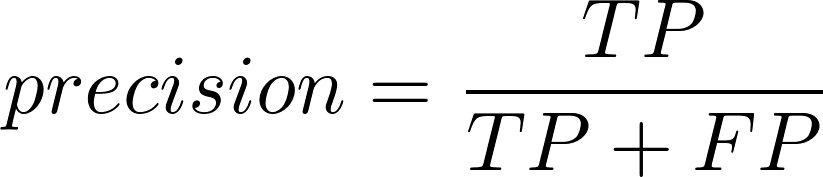

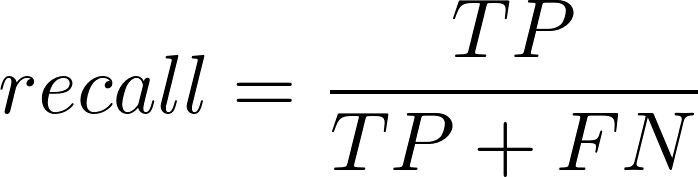

Следующий шаг - добавление метрик в таблицу.

In [ ]:
metrics = pd.DataFrame(
    index = ['roc-auc', 'precision', 'recall', 'f1', 'logloss']
)

metrics['Baseline_LR'] = [
    roc_auc_score(y_test, y_score),
    precision_score(y_test, y_pred),
    recall_score(y_test, y_pred),
    f1_score(y_test, y_pred),
    log_loss(y_test, y_pred)
]

metrics

,Baseline_LR
roc-auc,0.729222
precision,0.231035
recall,0.656423
f1,0.341778
logloss,11.573041


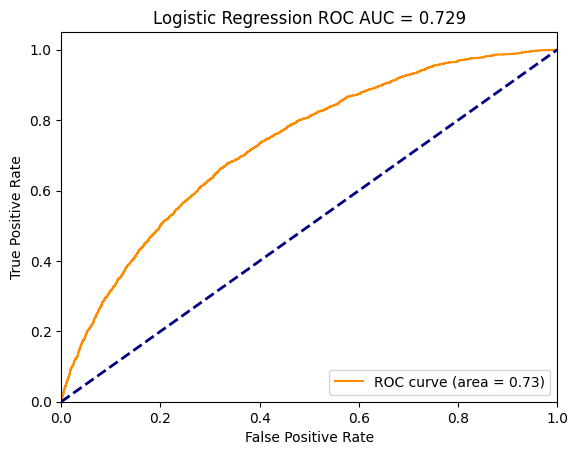

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc = "lower right")
plt.show()

## 4.2 GridSearchCV

`GridSearchCV` - это мощный инструмент для автоматического подбора оптимальных параметров моделей машинного обучения. Этот метод ищет оптимальные параметры путем систематического перебора, создавая модель для каждой возможной комбинации параметров.

In [ ]:
parameters_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.linspace(1, 1000, num=5),
    'solver': ['sag', 'saga', 'lbfgs'],
    'l1_ratio': [0.25, 0.5, 0.75],
    'max_iter': np.arange(100, 500, 100)
}

lr = LogisticRegression(class_weight='balanced')
cv = StratifiedKFold(n_splits=3, shuffle=True)
grid_cv = GridSearchCV(lr, parameters_grid, scoring = 'roc_auc', cv=cv, verbose=2)

In [ ]:
%%time

# Grid training
grid_cv.fit(X_train, y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=saga; total time=   4.5s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=saga; total time=   3.7s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=saga; total time=   2.9s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l2, solver=sag; total time=   2.4s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, pe

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': array([   1.  ,  250.75,  500.5 ,  750.25, 1000.  ]),
                         'l1_ratio': [0.25, 0.5, 0.75],
                         'max_iter': array([100, 200, 300, 400]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['sag', 'saga', 'lbfgs']},
             scoring='roc_auc', verbose=2)

In [ ]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.7358428581023269
{'C': 250.75, 'l1_ratio': 0.25, 'max_iter': 400, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
best_params = {
    'C': 250.75,
    'l1_ratio': 0.25,
    'max_iter': 400,
    'penalty': 'l2',
    'solver': 'lbfgs'
}

In [ ]:
lr_gr = LogisticRegression(**best_params, class_weight = 'balanced')
lr_gr.fit(X_train, y_train)

y_pred_gr = lr_gr.predict(X_test)
y_score_gr = lr_gr.predict_proba(X_test)[:, 1]

In [ ]:
print('roc-auc: ', roc_auc_score(y_test, y_score_gr))
print("precision:", precision_score(y_test, y_pred_gr))
print("recall: ", recall_score(y_test, y_pred_gr))
print("f1: ", f1_score(y_test, y_pred_gr))
print("logloss: ", log_loss(y_test, y_pred_gr))

roc-auc:  0.7298634629739905
precision: 0.23075768942235558
recall:  0.656423388817755
f1:  0.3414742451154529
logloss:  11.588669479904764


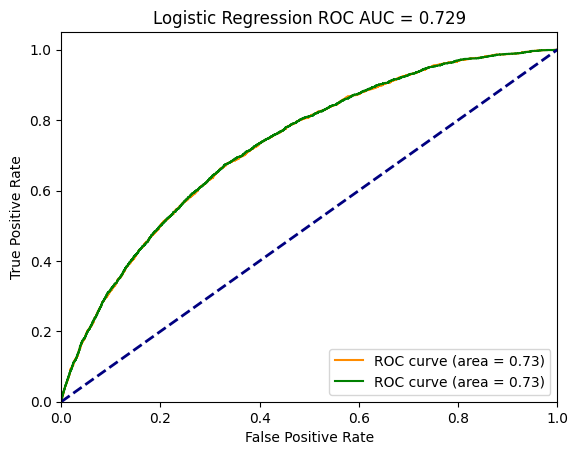

In [ ]:
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_score_gr)
roc_auc_2 = auc(fpr_2, tpr_2)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_2, tpr_2, color='green', label='ROC curve (area = %0.2f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.show()

In [ ]:
metrics['Grid_LR'] = [
    roc_auc_score(y_test, y_score_gr),
    precision_score(y_test, y_pred_gr),
    recall_score(y_test, y_pred_gr),
    f1_score(y_test, y_pred_gr),
    log_loss(y_test, y_pred_gr)
]

In [ ]:
metrics[:-1].style.highlight_max(axis=1, color='lightgreen')

,Baseline_LR,Grid_LR
roc-auc,0.729222,0.729863
precision,0.231035,0.230758
recall,0.656423,0.656423
f1,0.341778,0.341474


В целом, основываясь на представленных метриках, можно сказать, что `Grid_LR` и `Baseline_LR` демонстрируют схожую производительность, а различия в значениях метрик не слишком велики.

# 5. Анализ важных атрибутов (shap метод)

Значение Шэпли - это мера вклада каждой переменной в предсказание модели машинного обучения для конкретного примера данных. Эта мера основана на концепции кооперативной игры из теории игр и обеспечивает несмещенное распределение вкладов между переменными.

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 7.1 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
explainer = shap.LinearExplainer(lr_gr, X_train, feature_dependence="independent")
shap_values = explainer(X_test)

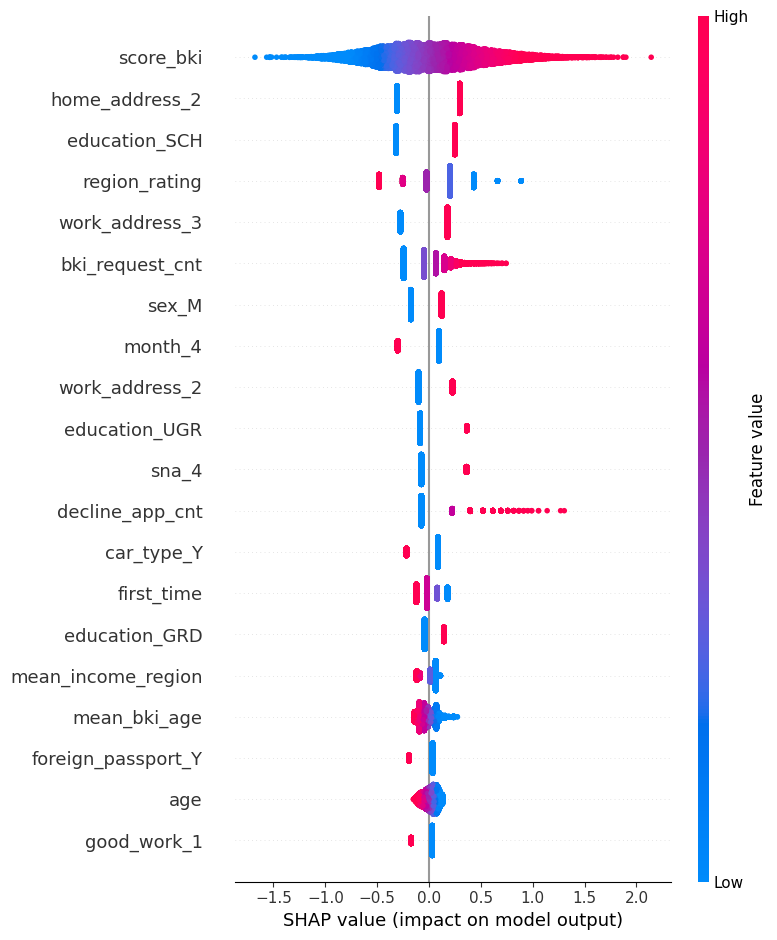

In [ ]:
# summary plot
shap.summary_plot(shap_values, X_test)

Признаки расположены по степени их важности вдоль оси OY, ось OX представляет значение Шепли. Каждая точка является отдельным наблюдением.

Цвет указывает значения соответствующего атрибута: красный - высокие, синий - низкие.


Рассмотрим пример:

- чем больше значение score_bki, тем выше вероятность дефолта;
- чем больше значение атрибута age, тем ниже вероятность дефолта.


Сравним с весами из логистической регрессии и проверим на нескольких признаках.

In [ ]:
lr_gr.coef_

array([[-0.23281027,  0.42836365,  1.00600652,  0.28249844, -0.02284355,
        -0.0324369 , -0.1002187 , -0.29092537,  0.36882807, -1.04912127,
         0.186435  , -0.02299665,  0.56505033,  0.44917433,  0.29684664,
         0.00805033, -0.30271501, -0.20343478,  0.60423718,  0.12703544,
         0.3274468 ,  0.45433323, -0.22777906,  0.257985  ,  0.17855153,
         0.43513986, -0.03976961, -0.07995995, -0.39751577]])

In [ ]:
feature_imp = pd.DataFrame()
feature_imp['feature'] = X.columns
feature_imp['imp'] = lr_gr.coef_[0]
feature_imp = feature_imp.sort_values(by='imp', ascending = False)

In [ ]:
feature_imp

,feature,imp
2,score_bki,1.006007
18,home_address_2,0.604237
12,education_SCH,0.565050
21,work_address_3,0.454333
13,education_UGR,0.449174
25,sna_4,0.435140
1,decline_app_cnt,0.428364
8,mean_income_age,0.368828
20,work_address_2,0.327447
14,sex_M,0.296847


Вес модели

In [ ]:
data_label.groupby('default')[['score_bki']].median()

,score_bki
default,
0,-1.956982
1,-1.683857


In [ ]:
vals = np.abs(shap_values.values).mean(0)
feature_names = X_train

feature_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name', 'feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)

In [ ]:
cols_show = list(set(feature_importance.col_name[:15]) & set(num_cols))
cols_show

['bki_request_cnt',
 'decline_app_cnt',
 'region_rating',
 'score_bki',
 'first_time']

In [ ]:
data_label[cols_show + ['default']].groupby('default')[cols_show].mean().T

default,0,1
bki_request_cnt,0.858317,1.013421
decline_app_cnt,0.135281,0.270484
region_rating,57.169044,53.677977
score_bki,-1.938048,-1.675637
first_time,2.806106,2.486022


Результаты:

- Средний скоринговый балл у клиентов с дефолтом равен -1.675637, что выше (то есть лучше), чем у клиентов без дефолта (-1.938048).


- Среднее количество отказов в заявках у клиентов с дефолтом равно 0.270484, что также выше, чем у клиентов без дефолта (0.135281). Это указывает на то, что клиенты с историей отказов по заявкам имеют более высокий риск дефолта.

- Средний рейтинг региона у клиентов с дефолтом составляет 53.677977, что ниже, чем у клиентов без дефолта (57.169044). Это может свидетельствовать о том, что клиенты из регионов с более низкими рейтингами чаще попадают в дефолт.